# Projeto 3 - Classificação basica com duas dimensões
---

## Tratando os dados 
---

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


## Vizualizando os dados em gráficos
---

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

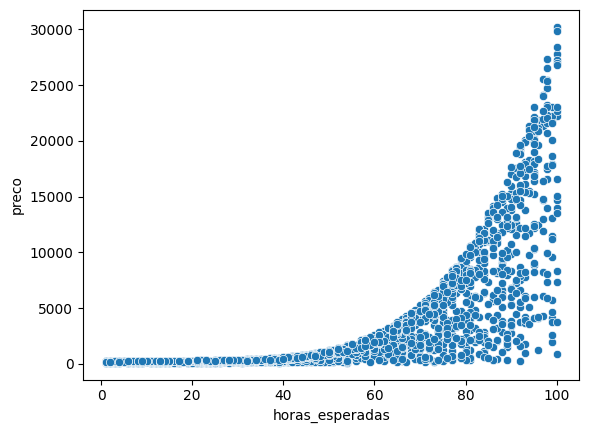

In [5]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

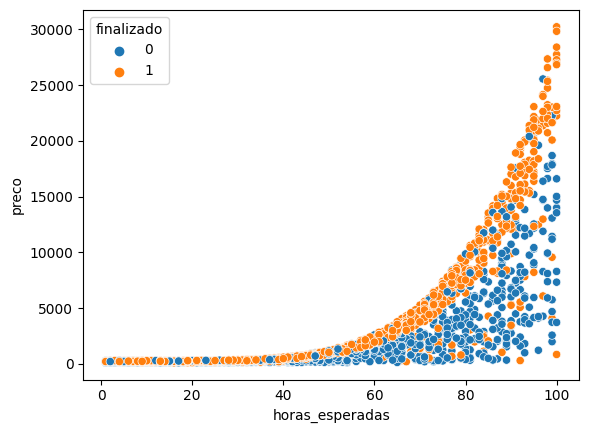

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

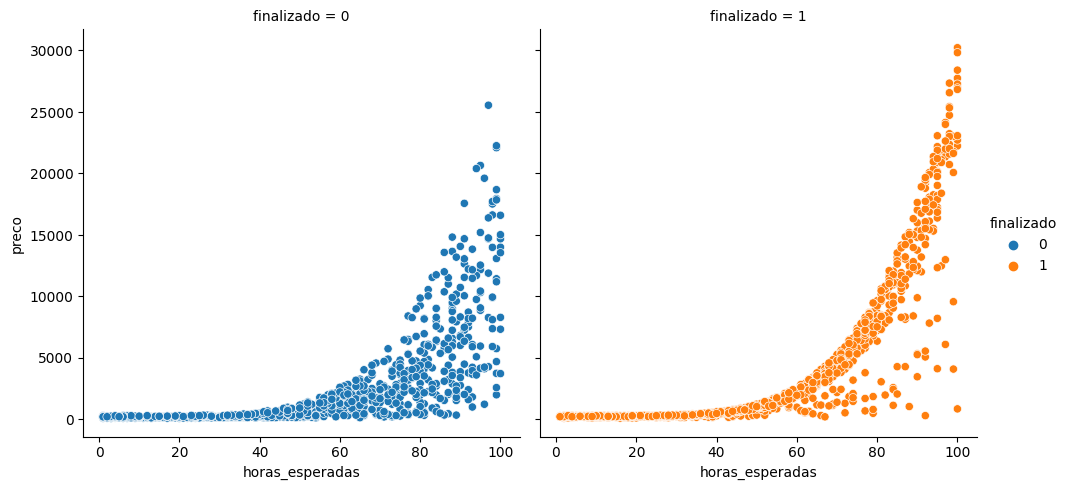

In [9]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

## Criação, teste e validação da acurácia do Modelo
---

In [12]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED =  20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y) # para que ele faça a proporção pelo eixo Y
print(f"treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de: {acuracia:.4f}')

treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de: 0.5667


C:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Algoritmo de baseline
---

<font color="red"> obs: algoritmo de baseline seria a base que nosso modelo deveria ser capaz de ser melhor </font>

In [16]:
import numpy as np

previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do algoritmo de baseline foi de: {acuracia:.4f}')

A acurácia do algoritmo de baseline foi de: 0.5259
